# Preamble

Title: *Air Quality in the Denver Metro Area (2020)*

Author: *Thyago Mota*

Email: *tmota at msudenver.edu*

Last Update: *2021-09-06*


# Introduction

This report presents the preliminary results of an analysis of air quality data in the Denver metropolitan area in 2020. Data for this report was obtained from information published daily by the Colorado Department of Public Health and Environment. 

# Dataset

The dataset for this report was built from informaton published daily at [Detailed Air Quality Summary](https://www.colorado.gov/airquality/air_quality_dynam.aspx). Web scraping techniques were employed to compile AQI (Air Quality Index) daily measurements in the year 2020. AQI is an index that takes into consideration the concentration of various air pollutants, including carbon monoxide, ozone, sulfur dioxide, among others. AQI varies from 0-500 and the levels of health concern are normally classified as follows:

* 0-50: Good
* 51-100: Moderate
* 101-150: Unhealthy for Sensitive Groups
* 151-200: Unhealthy
* 201-300: Very unhealthy
* 301-500: Hazardous

The script below automatically extracts daily AQI measurements in the year 2020. The information is saved in a json file (co_air_quality.json) with the following structure: 

```
[
  {"date": "01/01/2020", "aqi": 60}, 
  {"date": "01/02/2020", "aqi": 50}, 
  {"date": "01/03/2020", "aqi": 49},
  ...
  {"date": "12/31/2020", "aqi": 92}
]
```

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: data collection

from bs4 import BeautifulSoup
from google.colab import drive
from datetime import datetime, timedelta
import requests
import json
import time

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/co_air_quality/'
DATASET_NAME = 'co_air_quality.json'
BASE_URL = 'https://www.colorado.gov/airquality/air_quality_dynam.aspx'
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
BASE_YEAR = 2020

# Google drive mount
# drive.mount('/content/drive')

# data collection
date_str = '01/01/' + str(BASE_YEAR)
date = datetime.strptime(date_str, '%m/%d/%Y')
records = []
count = 0
while True:
  year = date.year
  if year != BASE_YEAR:
    break
  # print(datetime.strftime(date, '%m/%d/%Y'))
  date_str = datetime.strftime(date, '%m/%d/%Y')
  url = BASE_URL + f'?seeddate={date_str}'
  # print(url)
  result = requests.get(url, headers=HEADERS)
  if result.status_code == 200:
    soup = BeautifulSoup(result.content, 'html.parser')
    div = soup.find('div', {'id': 'divDenver'})
    if div:
      tds = div.find_all('td')
      a = tds[0].find('a')
      if a and 'Denver METRO' in a.text:
        aqi = int(tds[3].text)
        records.append({'date': date_str, 'aqi': aqi})
  # print(result.content)
  date = date + timedelta(days=1)
  time.sleep(2)
  count += 1
  # if count == 10:
  #   break

with open(DATA_FOLDER + DATASET_NAME, 'wt') as json_file:
  json.dump(records, json_file)

#print(records)

# Summary Statistics



In [48]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: summary statistics

import json
from google.colab import drive
from datetime import datetime, timedelta
import numpy as np

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/co_air_quality/'
DATASET_NAME = 'co_air_quality.json'
BASE_YEAR = 2020

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

aqis = []
for record in records:
  aqis.append(record['aqi'])
aqis_array = np.array(aqis)

print('*** Summary Statistics ***')
print(f'#records: {len(records)}')
print(f'AQI range: [{np.min(aqis_array)},{np.max(aqis_array)}]')
print('AQI mean: {:.2f}'.format(np.mean(aqis_array)))
print('AQI median: {:.2f}'.format(np.median(aqis_array)))
print('AQI std: {:.2f}'.format(np.std(aqis_array)))

*** Summary Statistics ***
#records: 366
AQI range: [30,181]
AQI mean: 71.75
AQI median: 63.00
AQI std: 27.48


# Visualizations

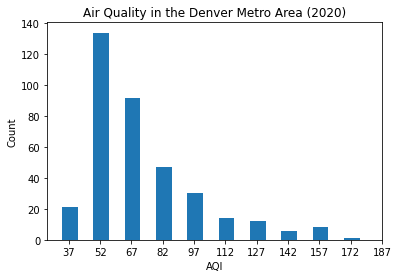

In [53]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: histogram

from google.colab import drive
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/co_air_quality/'
DATASET_NAME = 'co_air_quality.json'
BASE_YEAR = 2020

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

aqis = []
for record in records:
  aqis.append(record['aqi'])

bins = list(range(30, 185, 15))
counts, bins, _ = plt.hist(
    aqis, 
    bins=bins, 
    rwidth=0.5
)
xticks = [x + 7 for x in bins]
axes = plt.gca() # get a reference to the plot's axes
axes.set_xticks(xticks)
plt.xlabel('AQI')
plt.ylabel('Count')
plt.title('Air Quality in the Denver Metro Area (2020)')
plt.show()

*** Outliers ***
{'date': '06/17/2020', 'aqi': 146}
{'date': '07/10/2020', 'aqi': 146}
{'date': '08/17/2020', 'aqi': 136}
{'date': '08/21/2020', 'aqi': 161}
{'date': '08/22/2020', 'aqi': 156}
{'date': '08/23/2020', 'aqi': 161}
{'date': '08/24/2020', 'aqi': 150}
{'date': '08/25/2020', 'aqi': 154}
{'date': '08/26/2020', 'aqi': 143}
{'date': '09/06/2020', 'aqi': 161}
{'date': '09/07/2020', 'aqi': 164}
{'date': '09/16/2020', 'aqi': 142}
{'date': '09/17/2020', 'aqi': 153}
{'date': '09/27/2020', 'aqi': 134}
{'date': '09/30/2020', 'aqi': 133}
{'date': '10/07/2020', 'aqi': 143}
{'date': '10/16/2020', 'aqi': 173}
{'date': '10/17/2020', 'aqi': 181}


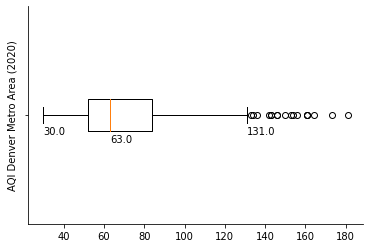

In [64]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: box plot

from google.colab import drive
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/co_air_quality/'
DATASET_NAME = 'co_air_quality.json'
BASE_YEAR = 2020

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

aqis = []
for record in records:
  aqis.append(record['aqi'])

bp = plt.boxplot(
    aqis, 
    vert=False
) 
for median in bp['medians']:
  xy = median.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)
    
for cap in bp['caps']:
  xy = cap.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)

min_whisker = bp['caps'][0].get_xydata()[0][0]
max_whisker = bp['caps'][1].get_xydata()[0][0]   

outliers = []
for record in records:
  if record['aqi'] < min_whisker or record['aqi'] > max_whisker:
    outliers.append(record)
print('*** Outliers ***')
for outlier in outliers:
  print(outlier)

axes = plt.gca()
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_yticklabels([''])
plt.ylabel('AQI Denver Metro Area (2020)')

plt.show()

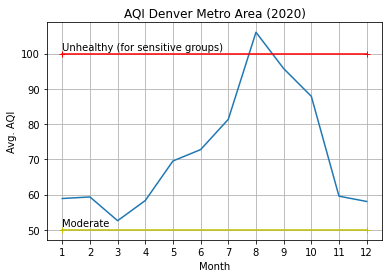

In [87]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: time series

from google.colab import drive
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/co_air_quality/'
DATASET_NAME = 'co_air_quality.json'
BASE_YEAR = 2020

# Google drive mount
# drive.mount('/content/drive')

with open(DATA_FOLDER + DATASET_NAME, 'rt') as json_file:
  records = json.load(json_file)

aqis = [ 0 ] * 12
counts = [ 0 ] * 12
for record in records:
  date = datetime.strptime(record['date'], '%m/%d/%Y')
  month = date.month
  aqis[month - 1] += record['aqi']
  counts[month - 1] += 1

aqis = [ aqis[i] / counts[i] for i in range(12) ]
# print(aqis)
plt.plot(list(range(1, 13)), aqis)
axes = plt.gca()
axes.set_xticks(list(range(1, 13)))
plt.xlabel('Month')
plt.ylabel('Avg. AQI')
plt.title('AQI Denver Metro Area (2020)')
plt.grid()
plt.plot([1, 12], [100, 100], '+r-')
plt.annotate('Unhealthy (for sensitive groups)', xy=[1, 101])
plt.plot([1, 12], [50, 50], '+y-')
plt.annotate('Moderate', xy=[1, 51])
plt.show()